## **Tarea 2** - Tensorflow: Gradient Descent y Tensorboard

#### Librerias a utilizar

In [184]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime

In [185]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()

#### Carga de Datos

In [186]:
array = np.load('training_data.npy')

#### Definición de la Clase ***Linear_regression***

In [187]:
class Linear_regression:
    
    def __init__(self):
        tf.reset_default_graph()
        self.parameters_vector = tf.get_variable("parameters", dtype=tf.float32, shape=[2,1], initializer=tf.zeros_initializer())
        
    def cost(self, y_train, y_predict):
        with tf.name_scope("cost"):
            return 1/2*tf.reduce_mean(tf.math.square(y_train - y_predict))
    
    def predict(self, x):
        with tf.name_scope("predict"):
            ones = tf.cast(tf.ones_like(x), tf.float32)
            return tf.matmul(tf.stack((x,ones), axis=-1), self.parameters_vector)
    
    def gradient(self, error_cost, y_train, y_predict):
        return tf.gradients(error_cost, self.parameters_vector)
    
    def update_parameters(self, error_cost, y_train, y_predict, learning_rate):
        with tf.name_scope("gradient"):
            gradient_vector = self.gradient(error_cost, y_train, y_predict)
        with tf.name_scope("update_params"):
            return tf.assign(self.parameters_vector, self.parameters_vector - learning_rate*gradient_vector[0])

#### Definición de la Clase ***Linear_model***

In [188]:
class Linear_model:
    
    def __init__(self, array):
        self.tamano_data_set = len(array)
        self.y = array[:,0]/1000
        self.x = array[:,1]        

    def training(self, learning_rate, steps):
        plt.scatter(x,y)
        lr = Linear_regression()
        x_train = tf.placeholder(tf.float32,[self.tamano_data_set],"x_train")
        y_train = tf.placeholder(tf.float32,[self.tamano_data_set],"y_train")

        y_predict = lr.predict(x)
        error = lr.cost(y_train, y_predict)
        error_summary = tf.summary.scalar(name="errors",tensor=error)
        update_parameters_vector = lr.update_parameters(error, y_train, y_predict, learning_rate)

        with tf.train.MonitoredSession() as session:
            feed_dict = {x_train:x, y_train:y}
            writer = tf.summary.FileWriter("./graphs/"+datetime.now().strftime("%Y%m%d_%H%M%S")+"_lr="+str(learning_rate), session.graph)

            for step in range(steps):
                e_summary = session.run(error_summary, feed_dict=feed_dict)
                session.run(update_parameters_vector,feed_dict=feed_dict)
                prediction = session.run(y_predict,feed_dict=feed_dict)
                writer.add_summary(e_summary, step)
                plt.plot(x,prediction,label=str(step))
            writer.close()

        plt.legend()
        plt.show()

#### Grafo del Modelo

<img src="https://raw.githubusercontent.com/estuardozapeta/Statistical-Learning-I-Tarea-2/master/graph.png">

#### Objeto de la clase ***Linear_model***

In [189]:
lm = Linear_model(array)

#### **Iteracion 1**: learning_rate = 0.03, iteraciones = 15

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


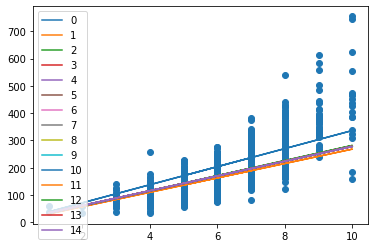

In [190]:
lm.training(0.03, 15)

#### **Iteracion 2**: learning_rate = 0.015, iteraciones = 20

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


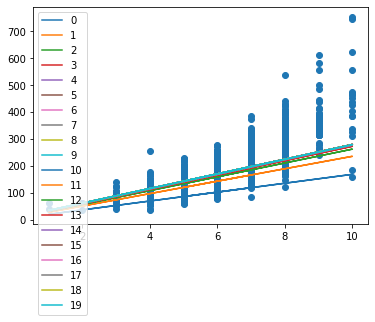

In [191]:
lm.training(0.015, 20)

#### **Iteracion 3**: learning_rate = 0.02, iteraciones = 25

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


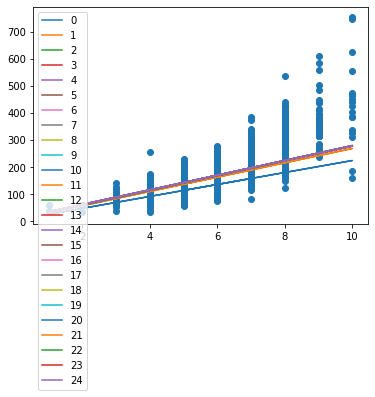

In [192]:
lm.training(0.02, 25)

#### **Iteracion 4**: learning_rate = 0.01, iteraciones = 18

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


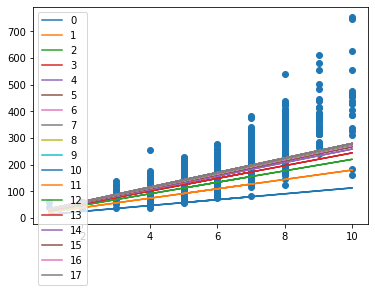

In [193]:
lm.training(0.01, 18)

#### **Iteracion 5**: learning_rate = 0.007, iteraciones = 30

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


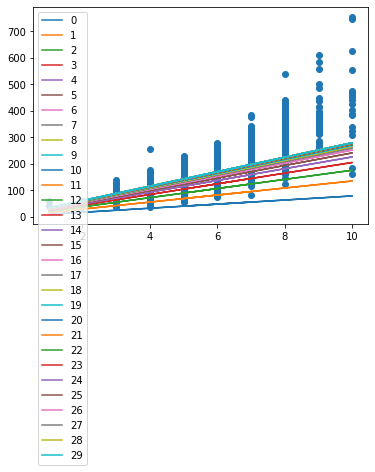

In [194]:
lm.training(0.007, 30)

#### **Iteracion 6**: learning_rate = 0.005, iteraciones = 28

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


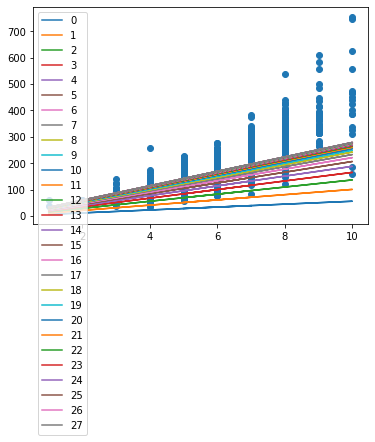

In [195]:
lm.training(0.005, 28)

#### **Iteracion 7**: learning_rate = 0.001, iteraciones = 23

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


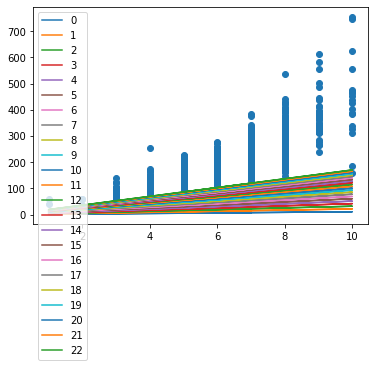

In [196]:
lm.training(0.001, 23)

#### **Iteracion 8**: learning_rate = 0.0083, iteraciones = 35

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


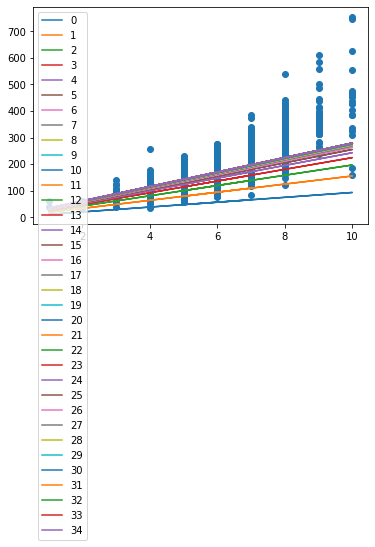

In [197]:
lm.training(0.0083, 35)

#### **Iteracion 9**: learning_rate = 0.0097, iteraciones = 20

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


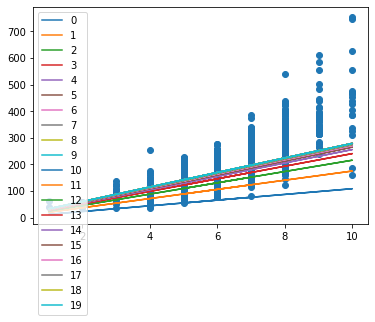

In [198]:
lm.training(0.0097, 20)

#### **Iteracion 10**: learning_rate = 0.0091, iteraciones = 16

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


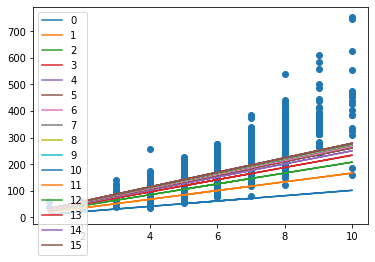

In [199]:
lm.training(0.0091, 16)